## TP5

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
import time

### 1 - 2 - 3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1119.76it/s]


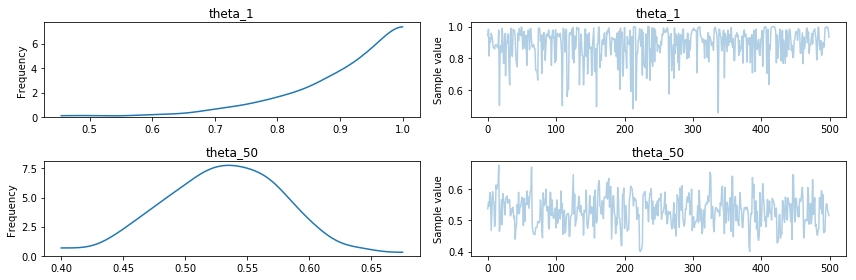

logp = -1.9115, ||grad|| = 4.26e-05: 100%|██████████| 25/25 [00:00<00:00, 2077.29it/s]  


Maximos a posteriori
theta_1:  0.999999112503
theta_50:  0.528846153846
Medias
theta_1:  0.891883029681
theta_50:  0.531241658111


Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
100%|██████████| 501/501 [00:01<00:00, 410.63it/s]


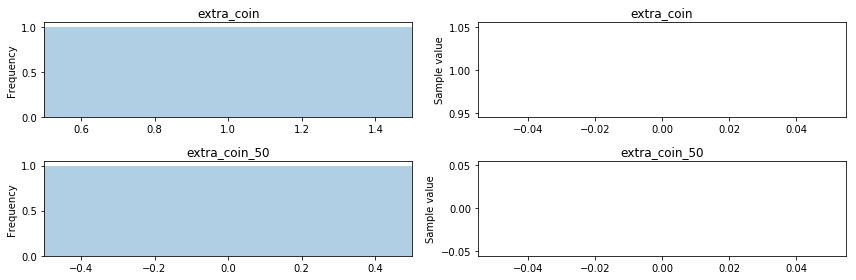

In [6]:
my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=6,p=theta,observed=6)
    posterior_50 = pm.Binomial("posterior_50",n=6,p=theta_50,observed=6)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print "Maximos a posteriori"
    print "theta_1: ", M["theta_1"]
    print "theta_50: ", M["theta_50"]
    
    print "Medias"
    print "theta_1: ", trace["theta_1"].mean()
    print "theta_50: ", trace["theta_50"].mean()
    time.sleep(.1) #Para que el output quede bien
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

### 4

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 90%|█████████ | 902/1000 [00:00<00:00, 1281.00it/s]/home/karamchand/.local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1000/1000 [00:00<00:00, 1278.58it/s]


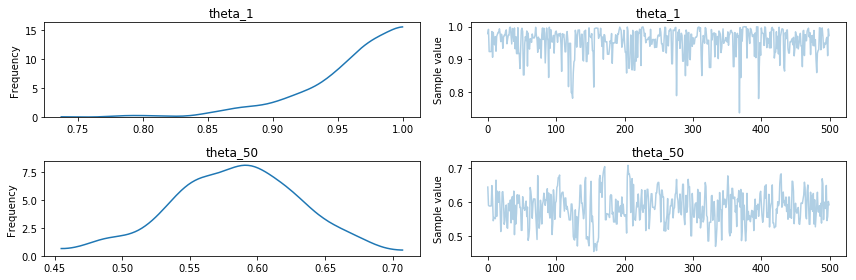

logp = -10.086, ||grad|| = 0.001355: 100%|██████████| 28/28 [00:00<00:00, 2018.88it/s]  


Maximos a posteriori
theta_1:  0.999999983921
theta_50:  0.584745696324
Medias
theta_1:  0.954347696676
theta_50:  0.583248253992


Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
100%|██████████| 501/501 [00:01<00:00, 446.61it/s]


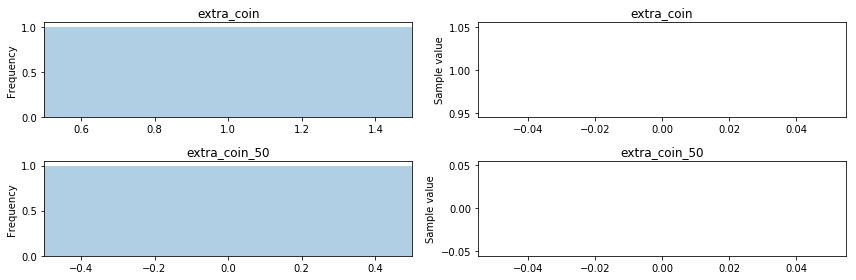

In [7]:
my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=20,p=theta,observed=20)
    posterior_50 = pm.Binomial("posterior_50",n=20,p=theta_50,observed=20)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print "Maximos a posteriori"
    print "theta_1: ", M["theta_1"]
    print "theta_50: ", M["theta_50"]
    
    print "Medias"
    print "theta_1: ", trace["theta_1"].mean()
    print "theta_50: ", trace["theta_50"].mean()
    time.sleep(.1) #Para que el output quede bien
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1126.93it/s]


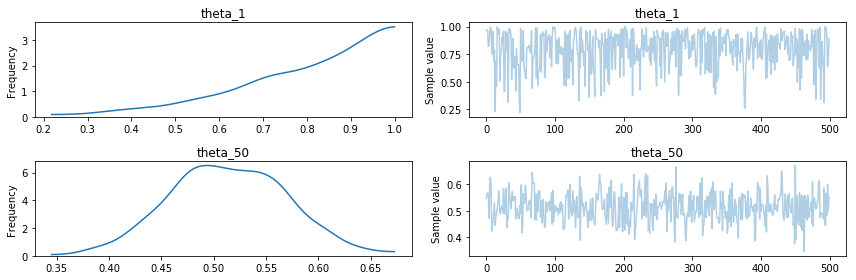

logp = 0.039371, ||grad|| = 4.0441e-05: 100%|██████████| 25/25 [00:00<00:00, 1752.53it/s]  


Maximos a posteriori
theta_1:  0.999998314985
theta_50:  0.514851485149
Medias
theta_1:  0.790228123228
theta_50:  0.513820384903


Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
100%|██████████| 501/501 [00:01<00:00, 455.14it/s]


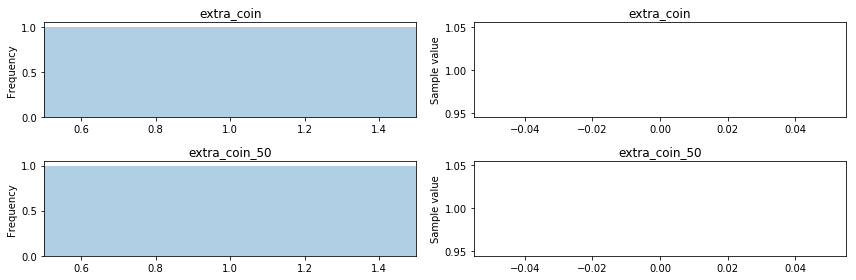

In [9]:
my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=3,p=theta,observed=3)
    posterior_50 = pm.Binomial("posterior_50",n=3,p=theta_50,observed=3)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print "Maximos a posteriori"
    print "theta_1: ", M["theta_1"]
    print "theta_50: ", M["theta_50"]
    
    print "Medias"
    print "theta_1: ", trace["theta_1"].mean()
    print "theta_50: ", trace["theta_50"].mean()
    time.sleep(.1) #Para que el output quede bien
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

Los prior con betas más altos representan una suposición más fuerte en el sentido de que son menos afectados por los siguientes tiros. Asumen un conocimiento mayor del contexto, en este caso, de tiradas anteriores de la moneda. En cambio, los prior con betas bajos no asumen mucha información previa. 

El modelo es útil para representar casos en los que partimos de asumir ciertas caracteristicas sobre la moneda, para determinar cuánta confianza le queremos dar a estas asunciones. Cuando no se tiene mucha información previa se comporta similarmente a un modelo frecuentista, en el que la probabilidad de obtener n caras en n tiros es $1/2^n$.

En definitiva, el modelo bayesiano parece permitirnos mayor libertad con respecto a la información que queremos obtener resultado de los experimentos que el frecuentista.

### 5
Consideramos que una moneda puede estar cargada a partir del 4º tiro seguido que sale lo mismo. Probando valores para los parámetros de beta encontramos que nuestro prior se corresponde con un Beta(4, 4). Agregando 3 caras no se desvía demasiado, pero agregando 4 la curva se mueve para la derecha.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1510.05it/s]


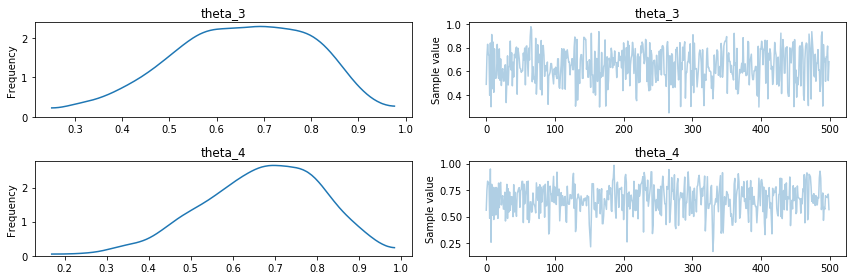

In [18]:
my_model = pm.Model()
with my_model:
    theta_3 = pm.Beta("theta_3", 4, 4)
    theta_4 = pm.Beta("theta_4", 4, 4)
    
    posterior_3 = pm.Binomial("posterior_3",n=3,p=theta_3,observed=3)
    posterior_4 = pm.Binomial("posterior_4",n=4,p=theta_4,observed=4)
    
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
